In [1]:
import pystac
import stac2dcache

from stac2dcache.utils import copy_asset, get_asset

ERROR 1: PROJ: proj_create_from_database: Open of /home/fnattino/mambaforge/envs/eratosthenes/share/proj failed


In [2]:
MACAROON_PATH = "./macaroon.dat"
CATALOG_URL = (
    "https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/"
    "eratosthenes/disk/red-glacier_shadows/catalog.json"
)

In [3]:
# configure connection to dCache
stac2dcache.configure(token_filename=MACAROON_PATH)

In [4]:
# read catalog
catalog = pystac.Catalog.from_file(
    CATALOG_URL, 
    stac_io=stac2dcache.stac_io,
)

In [5]:
# loop over all items, print items without assets (failed preprocessing)
for item in catalog.get_all_items():
    if not item.assets:
        print(item) 

<Item id=S2_2021-11-23>
<Item id=S2_2021-11-03>
<Item id=S2_2021-10-19>
<Item id=S2_2021-09-22>
<Item id=S2_2021-09-07>
<Item id=S2_2021-09-09>
<Item id=S2_2021-08-05>
<Item id=S2_2021-07-31>
<Item id=S2_2021-07-29>
<Item id=S2_2021-07-24>
<Item id=S2_2021-07-19>
<Item id=S2_2021-07-11>
<Item id=S2_2021-06-26>
<Item id=S2_2021-06-21>
<Item id=S2_2021-06-19>
<Item id=S2_2021-06-16>
<Item id=S2_2021-06-01>
<Item id=S2_2021-05-30>
<Item id=S2_2021-04-25>
<Item id=S2_2021-02-11>
<Item id=S2_2020-10-22>
<Item id=S2_2020-10-17>
<Item id=S2_2020-09-29>
<Item id=S2_2020-09-24>
<Item id=S2_2020-09-22>
<Item id=S2_2020-09-07>
<Item id=S2_2020-07-24>
<Item id=S2_2020-07-06>
<Item id=S2_2020-06-21>
<Item id=S2_2020-06-16>
<Item id=S2_2020-06-09>
<Item id=S2_2020-04-22>
<Item id=S2_2020-04-20>
<Item id=S2_2020-04-17>
<Item id=S2_2020-02-17>
<Item id=S2_2020-02-05>
<Item id=S2_2019-10-08>
<Item id=S2_2019-09-23>
<Item id=S2_2019-09-10>
<Item id=S2_2019-09-08>
<Item id=S2_2019-09-05>
<Item id=S2_2019

In [6]:
# extract specific item using its ID ("S2_YYYY-MM-DD")
item_id = "S2_2020-10-19"
item = catalog.get_item(item_id, recursive=True)
item

<Item id=S2_2020-10-19>

In [7]:
# list available assets
for key, asset in item.assets.items():
    print(f"{key}: {asset.get_absolute_href()}")

connectivity: https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/eratosthenes/disk/red-glacier_shadows/2020/10/19/S2_2020-10-19/conn.txt
shadow: https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/eratosthenes/disk/red-glacier_shadows/2020/10/19/S2_2020-10-19/shadow.tif
albedo: https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/eratosthenes/disk/red-glacier_shadows/2020/10/19/S2_2020-10-19/albedo.tif
shadow_artificial: https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/eratosthenes/disk/red-glacier_shadows/2020/10/19/S2_2020-10-19/shadow_artificial.tif
shade_artificial: https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/eratosthenes/disk/red-glacier_shadows/2020/10/19/S2_2020-10-19/shade_artificial.tif
stable_mask: https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/eratosthenes/disk/red-glacier_shadows/2020/10/19/S2_2020-10-19/stable_mask.tif
classification: https://webdav.grid.surfsara.nl:2880/pnfs/grid.sara.nl/data/eratosthenes/dis

In [8]:
# download one of the assets ...
copy_asset(
    catalog,
    asset_key="connectivity",  # asset key
    item_id=item_id,  # item ID - if not specified, download for all items
    to_uri="./",  # save assets to local folder
    filesystem_from=stac2dcache.fs,
    max_workers=1,  # if downloading multiple files, run on multiple workers
)

In [9]:
# assets are saved within folders named as the item_id
!head $item_id/conn.txt

# time: 2020-10-19
# caster_X caster_Y casted_X casted_Y azimuth zenith
+399970.06 +6698564.83 +399983.48 +6698694.23 +175.5150 +70.3975
+399979.45 +6698553.91 +399990.11 +6698663.41 +175.5150 +70.3975
+399989.56 +6698552.95 +399998.11 +6698642.54 +175.5150 +70.3975
+399998.49 +6698542.04 +400007.17 +6698631.63 +175.5150 +70.3975
+400005.63 +6698511.22 +400016.14 +6698620.72 +175.5150 +70.3975
+399970.00 +6698142.93 +399972.27 +6698182.74 +175.5150 +70.3975
+400015.55 +6698510.26 +400024.18 +6698599.85 +175.5150 +70.3975
+399973.77 +6698092.20 +399982.37 +6698161.87 +175.5150 +70.3975


In [10]:
# .. or read the asset directly
connectivity = get_asset(
    catalog,
    asset_key="connectivity",
    item_id=item_id,
    filesystem=stac2dcache.fs,
    driver="textfiles",  # raw text driver
)

# display first few lines
connectivity.splitlines()[:10]

['# time: 2020-10-19',
 '# caster_X caster_Y casted_X casted_Y azimuth zenith',
 '+399970.06 +6698564.83 +399983.48 +6698694.23 +175.5150 +70.3975',
 '+399979.45 +6698553.91 +399990.11 +6698663.41 +175.5150 +70.3975',
 '+399989.56 +6698552.95 +399998.11 +6698642.54 +175.5150 +70.3975',
 '+399998.49 +6698542.04 +400007.17 +6698631.63 +175.5150 +70.3975',
 '+400005.63 +6698511.22 +400016.14 +6698620.72 +175.5150 +70.3975',
 '+399970.00 +6698142.93 +399972.27 +6698182.74 +175.5150 +70.3975',
 '+400015.55 +6698510.26 +400024.18 +6698599.85 +175.5150 +70.3975',
 '+399973.77 +6698092.20 +399982.37 +6698161.87 +175.5150 +70.3975']

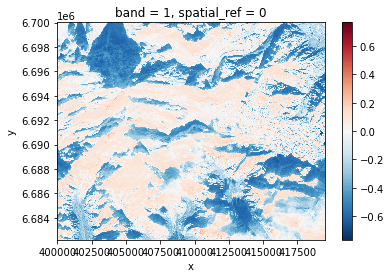

In [11]:
# same for raster files
shadow = get_asset(
    catalog,
    asset_key="shadow",
    item_id=item_id,
    filesystem=stac2dcache.fs,
    # driver="rasterio",  # driver can be inferred from file extension
)

# visualize
shadow.plot()